In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from custom_dataloader import replicate_data, replicate_data_single
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay,accuracy_score,f1_score,classification_report


# Compare RF and PRF with c2d

In [41]:
CIII = True # Train with Class III as a possible class
# YSO_EG_Stars Train
file_inp = "c2d_w_quality.csv"
input = pd.read_csv(file_inp)
bands = [idx for idx in input.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]
bands = bands[:-2]
bands.append("alpha")

inp_tr, tar_tr,inp_va, tar_va,inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
# while np.all(np.isfinite(inp_tr)) == False:
    # inp_tr, tar_tr, inp_va, tar_va, inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
# print('Assigned training, validation, and test sets.')

val = pd.read_csv("CC_w_Preds.csv")

# N22 = pd.read_csv('NGC_2264.csv')
# N22.drop(N22[N22.Target==3.].index,inplace=True)

bands = [idx for idx in val.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]
# bands = bands[:-2]
# bands.append("alpha")
print(bands)
inp_CC = val[bands].values.astype(float)
tar_CC = val[['Preds']].values.astype(int)

inp_tr, tar_tr,inp_te, tar_te,inp_va, tar_va = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000,3000,150000],[1000,1650,200000])# 171,133,693,219,1974,2500
inp_va, tar_va = inp_CC, tar_CC
# N22 = pd.read_csv('SPICY_w_quality.csv')
# print(np.unique(N22['Target'].values.astype(float)))
# inp_va2, tarva2 = replicate_data_single(N22[bands].values.astype(float),N22['Target'].values.astype(float),amounts = [len(np.where(N22[['Target']].values==0)[0]),len(np.where(N22[['Target']].values==1)[0]),len(np.where(N22[['Target']].values==2)[0])])

['mag_J', 'e_mag_J', 'mag_H', 'e_mag_H', 'mag_Ks', 'e_mag_Ks', 'mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4']


In [42]:
rf = RandomForestClassifier()

rf.fit(inp_tr,tar_tr.ravel())

pred_tr = rf.predict(inp_tr)
pred_va = rf.predict(inp_va)
# pred_va2 = rf.predict(inp_va2)


/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000
           2       1.00      1.00      1.00    150000

    accuracy                           1.00    156000
   macro avg       1.00      1.00      1.00    156000
weighted avg       1.00      1.00      1.00    156000



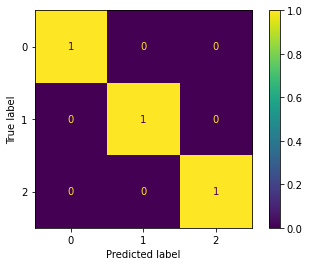

In [43]:
plot_confusion_matrix(rf,inp_tr,tar_tr,normalize='true')
print(classification_report(tar_tr,rf.predict(inp_tr)))

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


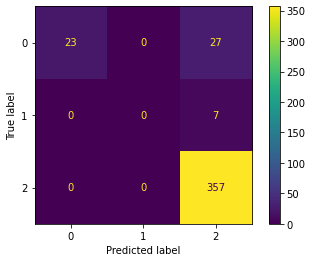

In [44]:
plot_confusion_matrix(rf,inp_va,tar_va)#,normalize='true'

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       958
           1       0.92      0.92      0.92      1649
           2       1.00      1.00      1.00    199999

    accuracy                           1.00    202606
   macro avg       0.94      0.97      0.95    202606
weighted avg       1.00      1.00      1.00    202606



/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


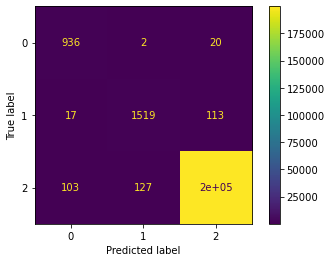

In [45]:
print(classification_report(tar_te, rf.predict(inp_te)))
plot_confusion_matrix(rf,inp_te,tar_te)

## PRF

In [16]:
from PRF import prf

In [17]:
val = pd.read_csv("CC_w_Preds.csv")
bands = [idx for idx in val.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]

bands.append("alpha")
print(bands)
# print(f"YSO shape: {input[input['Target']==0].shape}")
# print(f"EG shape: {input[input['Target']==1].shape}")
# print(f"Star shape: {input[input['Target']==2].shape}")


# input['Target']=preproc_yso(input[['alpha']].values,input[['Target']].values,CIII)

# inp_CC, tar_CC = replicate_data_single(val[bands].values.astype(float), val[['Preds']].values.astype(int),[val[val['Preds']==0].shape[0],val[val['Preds']==1].shape[0],val[val['Preds']==2].shape[0]])# 171,133,693,219,1974,2500
inp_CC = val[bands].values.astype(float)
tar_CC = val[['Preds']].values.astype(int)

In [61]:
# X_train = inp_tr[:,(0,2,4,6)]
# dX_train = inp_tr[:,(1,3,5,7)]
# y_train = tar_tr
# X_val = inp_va[:,(0,2,4,6)]
# dX_val = inp_va[:,(1,3,5,7)]
# y_val = tar_va
# X_test = inp_va[:,(0,2,4,6)]
# dX_test = inp_va[:,(1,3,5,7)]
# y_test = tar_va

X_train = inp_tr[:,(0,2,4,6,8,10,12)]
dX_train = inp_tr[:,(1,3,5,7,9,11,13)]
y_train = tar_tr

X_val = inp_CC[:,(0,2,4,6,8,10,12)]
dX_val = inp_CC[:,(1,3,5,7,9,11,13)]
y_val = tar_CC

X_test = inp_te[:,(0,2,4,6,8,10,12)]
dX_test = inp_te[:,(1,3,5,7,9,11,13)]
y_test = tar_te




In [62]:

prf_cls = prf(n_estimators=100, bootstrap=True, keep_proba=0.05)
prf_cls.fit(X=X_train, dX=dX_train, y=y_train)

ProbabilisticRandomForestClassifier(n_estimators_='100', criterion='gini', max_features='auto', max_depth='None', keep_proba='0.05', bootstrap='True', min_py_sum_leaf='1', n_features_='7', feature_importances_='[0.04457968 0.05356429 0.04641696 0.05502917 0.10287436 0.17573063
 0.29397034]', max_features_num='2', unsupervised='False', n_classes_='3')

In [63]:

pred_tr = prf_cls.predict(X=X_train, dX=dX_train)
pred_te = prf_cls.predict(X=X_test, dX=dX_test)

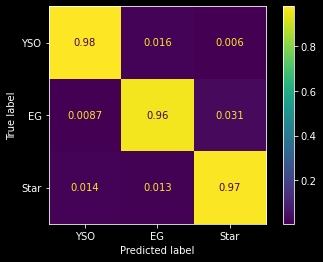

In [64]:
ConfusionMatrixDisplay.from_predictions(tar_tr,pred_tr,normalize='true',display_labels=['YSO','EG','Star'])

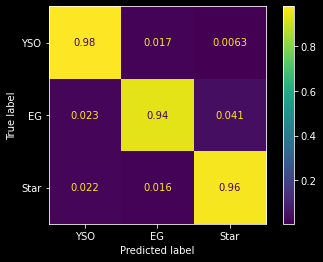

In [65]:
ConfusionMatrixDisplay.from_predictions(tar_te,pred_te,normalize='true',display_labels=['YSO','EG','Star'])

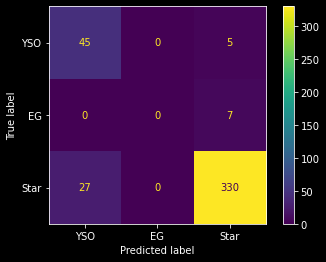

In [66]:

pred_va = prf_cls.predict(X=X_val, dX=dX_val)
ConfusionMatrixDisplay.from_predictions(y_val,pred_va,display_labels=['YSO','EG','Star'])

In [67]:
val.head()
val['RF_Preds'] = pred_va


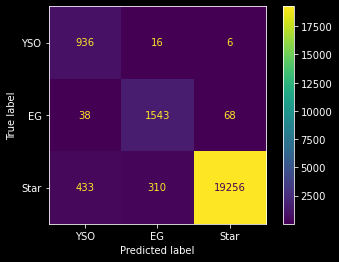

In [68]:
ConfusionMatrixDisplay.from_predictions(tar_te,pred_te,display_labels=['YSO','EG','Star'])

In [69]:
val.to_csv('CC_w_Preds_RF.csv')

# JWST Classification

In [51]:
webb_inp = pd.read_csv('../../NGC_3324/CC_JWST_NIRCAM_MIRI_Full_Nov182022_vegamag.csv')
all_inp = pd.read_csv('CC_Webb_NIRCam_MIRI_Spitz_2m_w_Preds.csv')
print(len(all_inp))

bands = [idx for idx in webb_inp.columns.values if (idx[:3].lower() == 'iso'.lower())]
bands_IR = [idx for idx in all_inp.columns.values if ((idx[:3] == 'mag') or (idx[:5] == 'e_mag'))]
# bands.remove('isophotal_vegamag_f444w-f470n')
# bands.remove('isophotal_vegamag_err_f444w-f470n')
# all_inp.dropna(subset=bands[-2:],inplace=True)
print(bands_IR)
input_webb = all_inp[bands].to_numpy()
tar_webb = all_inp[["Preds"]].to_numpy()
tar_webb[tar_webb==2] = 1
print(np.unique(tar_webb))

473
['mag_J', 'e_mag_J', 'mag_H', 'e_mag_H', 'mag_Ks', 'e_mag_Ks', 'mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4']
[0. 1.]


In [78]:
# inp_CC, tar_CC = replicate_data_single(,tar_webb,amounts=[len(tar_webb[tar_webb==0]),len(tar_webb[tar_webb==0])*2])
pred_CC = rf.predict(all_inp[bands_IR].to_numpy())
# np.unique(pred_CC)
pred_CC[pred_CC==2] = 1
np.unique(pred_CC)

array([0, 1])

In [112]:
cont = True
amounts_te = []
f1scores = []
for i in np.arange(0,1000,10): 
    i= 290
    inp_tr, tar_tr = replicate_data_single(input_webb,pred_CC,amounts=[len(pred_CC[pred_CC==0]),len(pred_CC[pred_CC==0])*3],seed=i)
    # while np.all(np.isfinite(inp_tr)) == False:
    #     inp_tr, tar_tr = replicate_data_single(input_webb,tar_webb,amounts=[len(tar_webb[tar_webb==0])]*2)
    webb_inp_tar = np.random.randint(low = 0,high=2,size=webb_inp.shape[0])
    inp_te, tar_te = replicate_data_single(webb_inp[np.r_[['RA','DEC','size'],bands]].to_numpy(),webb_inp_tar,amounts=[len(webb_inp_tar[webb_inp_tar==0]),len(webb_inp_tar[webb_inp_tar==1])],seed=i)
    inp_te_radec = inp_te[:,:3]
    inp_te = inp_te[:,3:]


    inp_va, tar_va = replicate_data_single(input_webb,pred_CC,amounts=[len(pred_CC[pred_CC==0]),len(pred_CC[pred_CC==1])],seed=i)
    

    inds = (0,2,4,6,8,10,12,14,16,18)
    X_train = inp_tr[:,inds]
    # dX_train = inp_tr[:,(1,3,5,7,9,11)]
    dX_train = np.array([[0.1]*(int(len(inds)))]*len(tar_tr))
    y_train = tar_tr



    X_val = inp_va[:,inds]
    # dX_val = inp_va[:,(1,3,5,7,9,11)]
    dX_val = np.array([[0.1]*(int(len(inds)))]*len(tar_va))
    y_val = tar_va


    X_test = inp_te[:,inds]
    # dX_test = inp_te[:,(1,3,5,7,9,11)]
    dX_test = np.array([[0.1]*(int(len(inds)))]*len(X_test))


    prf_cls = prf(n_estimators=100, bootstrap=False, keep_proba=0.75)
    prf_cls.fit(X=X_train, dX=dX_train, y=y_train)

    pred_tr = prf_cls.predict(X=X_train, dX=dX_train)
    # ConfusionMatrixDisplay.from_predictions(tar_tr,pred_tr,normalize='true')
    # print(np.array(bands)[np.array(inds)])

    pred_te = prf_cls.predict(X=X_test, dX=dX_test)
    
    # print(len(pred_te[pred_te==0]))
    # print(len(pred_te[pred_te==1]))
    f1scores.append(f1_score(tar_tr,pred_tr))
    amounts_te.append(len(pred_te[pred_te==0]))


print(classification_report(tar_tr,pred_tr))
print(prf_cls.feature_importances_)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        36
           1       0.90      1.00      0.95       108

    accuracy                           0.92       144
   macro avg       0.95      0.83      0.87       144
weighted avg       0.92      0.92      0.91       144

[0.00369787 0.0142959  0.00829852 0.01849928 0.02818522 0.05582917
 0.00306194 0.00072753 0.00043839 0.00035529]


Max F1=Score 0.9600000000000001
Max F1=Score seed 290


Text(0.5, 0, 'Amount of objects classified as YSOs')

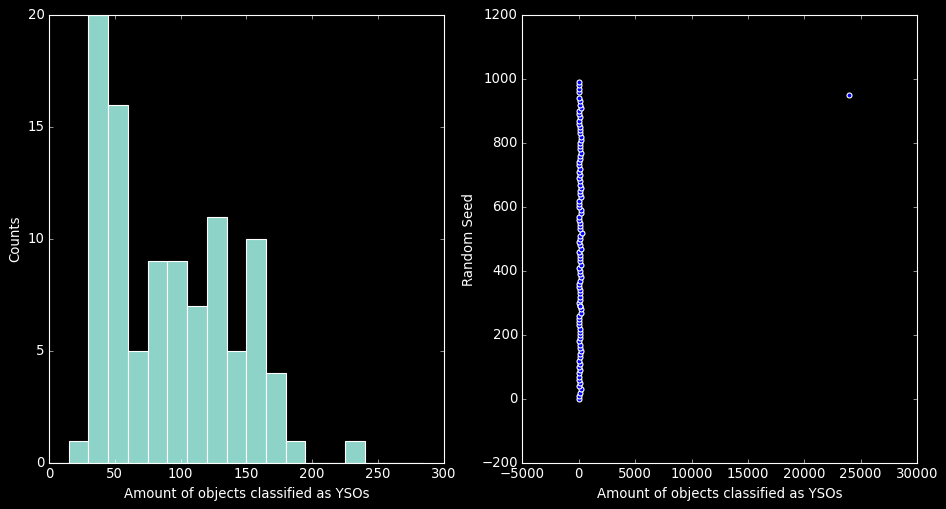

In [111]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
max_value = max(f1scores)
max_ind = f1scores.index(max_value)
print('Max F1=Score',max_value)
print('Max F1=Score seed',np.arange(0,1000,10)[max_ind])

axs[0].hist(amounts_te,bins=np.arange(0,300,15))
axs[0].set_ylabel('Counts')
axs[0].set_xlabel('Amount of objects classified as YSOs')
axs[1].scatter(amounts_te,np.arange(0,1000,10))
axs[1].scatter(amounts_te[max_ind],np.arange(0,1000,10)[max_ind])
axs[1].set_ylabel('Random Seed')
axs[1].set_xlabel('Amount of objects classified as YSOs')

              precision    recall  f1-score   support

           0       0.47      0.61      0.53        36
           1       0.97      0.94      0.95       437

    accuracy                           0.92       473
   macro avg       0.72      0.78      0.74       473
weighted avg       0.93      0.92      0.92       473



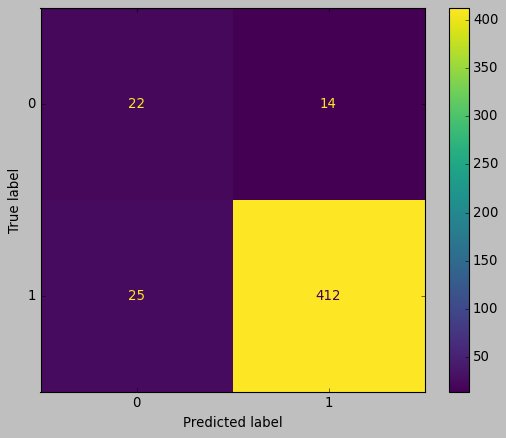

In [104]:
plt.style.use('classic')


pred_va = prf_cls.predict(X=X_val, dX=dX_val)
print(classification_report(tar_va,pred_va))

ConfusionMatrixDisplay.from_predictions(tar_va,pred_va)

Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.574327 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654444171.915 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


159.09784709430238
159.17624999999995


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

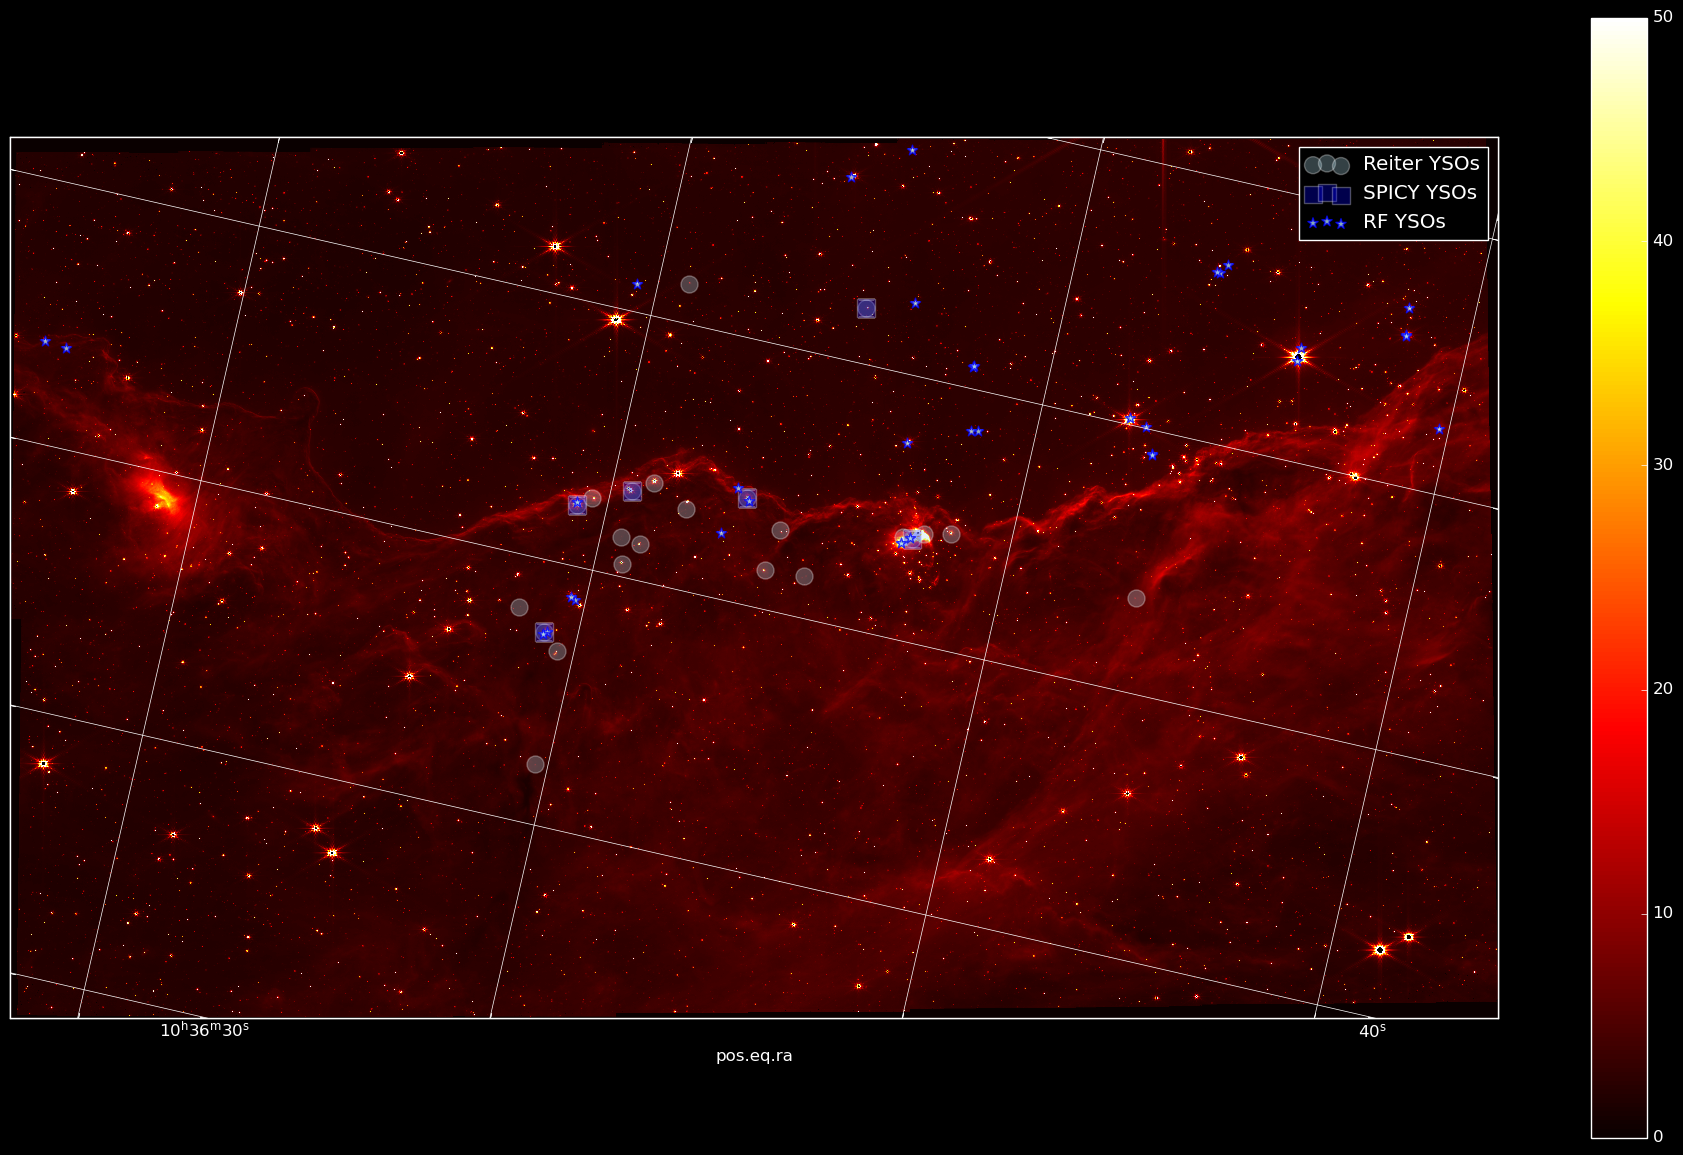

In [105]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u


# Plot image
filter = "f444w"
image_file = f"../../../ngc3324/FITS/JWST_{filter}.fits"


h = fits.getheader(image_file)

f = fits.open(image_file)

wcs = WCS(f[1].header)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(24,14),dpi=100)
ax = plt.subplot(projection=wcs)

plt.grid(color='white', ls='solid')
plt.imshow(f[1].data,cmap='hot',vmin=0,vmax=50,origin='lower') #vmax =1500 for f1800w
ymax, ymin = ax.get_ylim()
xmax, xmin = ax.get_xlim()
plt.colorbar()

ras, decs = wcs.wcs_pix2world(np.linspace(-500,15000,100), np.linspace(-500,16000,100), 1)
print(min(ras))

reit = ["10:36:42.3 -58:38:04", "10:36:48.0 -58:38:19", "10:36:47.3 -58:38:10", "10:36:46.7 -58:38:05", "10:36:51.5 -58:37:54", "10:36:50.5 -58:37:52",\
    "10:36:51.4 -58:37:48", "10:36:53.8 -58:37:48", "10:36:51.5 -58:37:10", "10:36:54.2 -58:36:26", "10:36:54.4 -58:36:18", "10:36:54.0 -58:37:20",\
        "10:36:53.6 -58:35:20", "10:36:53.1 -58:37:37", "10:36:53.3 -58:37:54", "10:36:52.7 -58:38:05", "10:36:53.1 -58:37:08", "10:36:51.6 -58:36:58",\
        "10:36:52.3 -58:38:09", "10:36:53.9 -58:36:29", "10:37:01.5 -58:37:51", "10:37:02.1 -58:36:58", "10:36:53.9 -58:36:32"]# End of third row is the end of MHO-only sources
sky_1 = SkyCoord(reit,unit=(u.hourangle, u.deg))
ra_1 = sky_1.ra
dec_1 = sky_1.dec

reit_eg = ["10:36:53.7 -58:35:47", "10:36:59.5 -58:39:01", "10:37:07.2 -58:35:36", "10:36:55.2 -58:38:09"]
sky_1 = SkyCoord(reit_eg,unit=(u.hourangle, u.deg))
ra_eg = sky_1.ra
dec_eg = sky_1.dec


spicy = ["10:36:47.3 -58:38:10","10:36:54.0 -58:37:20","10:36:53.9 -58:36:29","10:37:02.1 -58:36:58","10:36:53.3 -58:37:54","10:36:52.3 -58:38:09"]
sky_1 = SkyCoord(spicy,unit=(u.hourangle, u.deg))
ra_spicy = sky_1.ra
dec_spicy = sky_1.dec


yso = np.where(pred_te==0)[0]
# egs = np.where(np8[:,-1]==1)[0]
sta = np.where(pred_te==1)[0]
print(ra_1[0]/u.deg)
tol = 0.000117
plt.scatter(ra_1,dec_1, marker='o', c='lightblue',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='Reiter YSOs')
plt.scatter(ra_spicy,dec_spicy, marker='s', c='b',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='SPICY YSOs')
# plt.scatter(webb_inp.iloc[sta].RA,webb_inp.iloc[sta].DEC, marker='*', c='gray',s=60, alpha=0.1,transform=ax.get_transform('fk5'),label='Webb only Stars')
# plt.scatter(inp_te_radec[yso,0],inp_te_radec[yso,1], marker='*', c='lightblue',s=150, alpha=0.5,transform=ax.get_transform('fk5'),label='Webb only YSOs')
# plt.plot([inp_te_radec[yso[0],0],inp_te_radec[yso[0],0]+2*tol],[inp_te_radec[yso[0],1],inp_te_radec[yso[0],1]],transform=ax.get_transform('fk5'),c='r',linewidth=0.5)
# # plt.scatter(ra_eg,dec_eg, marker='o', c='gold',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='Reiter EGs')
# # plt.scatter(np.array(jwst_spitz_cat.RA),np.array(jwst_spitz_cat.DEC), marker='s', c='b',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='SPICY YSOs')
# ax.scatter(all_inp.iloc[np.where(tar_webb==0)[0]].RA,all_inp.iloc[np.where(tar_webb==0)[0]].DEC, marker='*', c='b',edgecolor = 'b',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder YSOs")
# ax.scatter(all_inp.iloc[np.where(tar_webb==1)[0]].RA,all_inp.iloc[np.where(tar_webb==1)[0]].DEC, marker='*', c='g',edgecolor = 'g',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder Stars")
ax.scatter(all_inp.iloc[np.where(pred_CC==0)[0]].RA,all_inp.iloc[np.where(pred_CC==0)[0]].DEC, marker='*', c='lightblue',edgecolor = 'b',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "RF YSOs")
# ax.scatter(np8[egs,0],np8[egs,1], marker='*', c='y',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder EGs")
# ax.scatter(np8[sta,0],np8[sta,1], marker='*', c='g',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder Stars")
ax.set_ylim(ymax, ymin)
ax.set_xlim(xmax, xmin)
plt.legend(loc=1)
plt.xticks()

# plt.savefig(f"../../ngc3324/CC_w_Reiter_RF_Label_{filter}.png",dpi=100)


In [574]:
webb_only = pd.DataFrame()
webb_only[['RA','DEC','size']] = inp_te_radec
webb_only[bands] = inp_te
webb_only['PRF_Preds'] = pred_te
webb_only.sort_values('RA',inplace=True,)
webb_only

,RA,DEC,size,isophotal_vegamag_f090w,isophotal_vegamag_err_f090w,isophotal_vegamag_f187n,isophotal_vegamag_err_f187n,isophotal_vegamag_f200w,isophotal_vegamag_err_f200w,isophotal_vegamag_f335m,...,isophotal_vegamag_err_f444w-f470n,isophotal_vegamag_f770w,isophotal_vegamag_err_f770w,isophotal_vegamag_f1130w,isophotal_vegamag_err_f1130w,isophotal_vegamag_f1280w,isophotal_vegamag_err_f1280w,isophotal_vegamag_f1800w,isophotal_vegamag_err_f1800w,PRF_Preds
66614,159.117914,-58.671966,0.000012,NaN,NaN,22.148428,16.255349,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
70754,159.117997,-58.671282,0.000012,NaN,NaN,NaN,NaN,25.549533,16.847119,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51446,159.118029,-58.671566,0.000012,NaN,NaN,21.852317,16.012066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
29529,159.118041,-58.671181,0.000010,NaN,NaN,NaN,NaN,24.689184,16.299145,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
21973,159.118107,-58.671595,0.000009,25.362627,16.242793,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38754,159.306612,-58.569086,0.000025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7111,159.306735,-58.570691,0.000011,24.241339,15.593365,21.469543,16.132494,21.145917,14.240716,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
65097,159.306954,-58.569131,0.000025,NaN,NaN,NaN,NaN,NaN,NaN,22.533181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12109,159.307037,-58.569703,0.000015,NaN,NaN,NaN,NaN,22.446294,15.141453,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [575]:
# webb_only.to_csv("Webb_Preds_no_Spitzer.csv",index=False)

In [576]:
def sed_plot(row,correction=0.5,maxes=None,chi2=None):
    fig, ax = plt.subplots(figsize=(12,6),dpi=100)
    plt.rcParams['font.size'] = 12
    plt.rcParams['font.family'] = 'serif'
    plt.style.use('ggplot')
    plt.gca().invert_yaxis()

    kwargs = {
        'marker': 'o',
        'linestyle': '-.',
        'alpha': 0.6
    }

    webb_bands = [idx for idx in row.columns.values if (idx[:3].lower() == 'iso' and (idx[-9:-6] != 'err' and idx[-15:-12] != 'err'and idx[-10:-7] != 'err'))]
    webb_mic = [int(webb_bands[i].split('f')[-1][:-1])/100 for i in np.arange(0,len(webb_bands))]
    
    spitz2m_bands = [idx for idx in row.columns.values if (idx[:3].lower() == 'mag')]
    spitz_mic = [1.235,1.662,2.159,3.6,4.5,5.8,8.0]


    all_mic = list(np.r_[webb_mic,spitz_mic]) # Collect list of values for xticks
    del all_mic[4] # Delete the xtick label of 4.44 to avoid over crowding

    
    plt.plot(webb_mic,row[webb_bands].to_numpy()[0]+correction,**kwargs,label='Webb SED')
    plt.plot(spitz_mic,row[spitz2m_bands].to_numpy()[0],**kwargs, label='Spitzer/2MASS SED')
    plt.plot(spitz_mic,maxes,'.',marker='x',markersize=10,label='Noise Values')
    plt.plot(label=f'$\chi$ Squared: {chi2}')
    plt.legend(facecolor='darkgrey', framealpha=1,loc='lower right')
    plt.xticks(all_mic)
    plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
    plt.xlabel('Wavelength')
    plt.ylabel('Magnitude (Vega)')


In [577]:
all_inp.dropna(subset='isophotal_vegamag_f1130w')

,Unnamed: 0.1,Unnamed: 0,RA,DEC,isophotal_vegamag_f090w,isophotal_vegamag_err_f090w,aper30_vegamag_f090w,aper30_vegamag_err_f090w,aper50_vegamag_f090w,aper50_vegamag_err,...,mag_IR1,e_mag_IR1,mag_IR2,e_mag_IR2,mag_IR3,e_mag_IR3,mag_IR4,e_mag_IR4,alpha,Preds
2,2,2,159.268010,-58.580141,NaN,NaN,NaN,NaN,NaN,NaN,...,7.416,0.044,6.873,0.049000,6.399,0.033000,5.622,0.024000,-0.76836,0.0
4,4,4,159.251049,-58.592654,12.768613,8.807995,NaN,NaN,NaN,0.000000,...,8.670,0.056,7.916,0.042000,7.082,0.033000,5.858,0.025000,0.55512,0.0
7,7,8,159.237666,-58.593060,NaN,NaN,NaN,NaN,NaN,NaN,...,13.914,0.090,13.686,0.155000,18.524,0.144951,18.350,0.119339,-10.46896,2.0
10,10,11,159.218466,-58.635844,NaN,NaN,NaN,NaN,NaN,12.955020,...,10.634,0.206,9.318,0.082000,8.194,0.095000,7.359,0.290000,0.39276,0.0
19,19,20,159.194353,-58.643507,12.717593,9.395961,NaN,NaN,NaN,14.752719,...,9.883,0.054,9.958,0.047000,9.688,0.109000,18.350,0.119339,-16.58288,2.0
23,23,25,159.203066,-58.634238,15.413921,9.899621,NaN,NaN,NaN,NaN,...,10.781,0.046,10.136,0.049000,9.450,0.048000,8.684,0.061000,-0.43872,0.0
28,28,31,159.227792,-58.604969,NaN,NaN,NaN,NaN,NaN,NaN,...,12.063,0.163,11.466,0.097000,18.524,0.144951,18.350,0.119339,-14.10976,2.0
31,31,34,159.224385,-58.630020,NaN,NaN,NaN,NaN,NaN,0.000000,...,11.944,0.144,10.794,0.115000,9.846,0.162000,18.350,0.119339,-15.21184,2.0
51,51,57,159.230332,-58.641877,15.130016,10.355580,NaN,NaN,NaN,NaN,...,11.534,0.092,11.379,0.064000,11.190,0.076000,11.593,0.105000,-3.17096,2.0
62,62,74,159.267566,-58.599145,17.093678,11.600373,NaN,NaN,NaN,8.946592,...,11.676,0.045,11.577,0.064000,11.325,0.082000,12.050,0.205000,-3.59572,2.0


In [578]:
from astropy.coordinates import match_coordinates_sky
j_sky = SkyCoord(webb_only.RA*u.deg, webb_only.DEC*u.deg)
s2_sky = SkyCoord(all_inp.RA*u.deg, all_inp.DEC*u.deg)
# sp_sky = SkyCoord(spicy_cat['     RAdeg      DEdeg'].to_numpy(),unit=u.deg)



idx, sep2d, x = match_coordinates_sky(j_sky, s2_sky, nthneighbor=1, storekdtree='kdtree_sky')
sep_constraint = sep2d < np.array(webb_only['size']*2)*u.deg

print(np.count_nonzero(sep_constraint))

j_matches = webb_only[sep_constraint]
s2_matches = all_inp.iloc[idx[sep_constraint]]

j_matches.reset_index(drop=True,inplace=True)
s2_matches.reset_index(drop=True,inplace=True)

jwst_spitz_cat = pd.concat([j_matches[['PRF_Preds']],s2_matches],axis=1)

520


In [690]:
jwst_spitz_cat[jwst_spitz_cat.PRF_Preds==0][jwst_spitz_cat.Preds!=0].index

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/3102115856.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jwst_spitz_cat[jwst_spitz_cat.PRF_Preds==0][jwst_spitz_cat.Preds!=0].index


Int64Index([  9,  36,  48,  96, 108, 109, 116, 129, 131, 153, 174, 185, 197,
            232, 241, 244, 259, 266, 269, 276, 320, 344, 349, 354, 355, 356,
            365, 370, 392, 410, 437, 441, 463, 502, 506],
           dtype='int64')

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/57693099.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(spitz_mic,maxes,'.',marker='x',markersize=10,label='Noise Values')


2.0
1.0


/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/1322512742.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


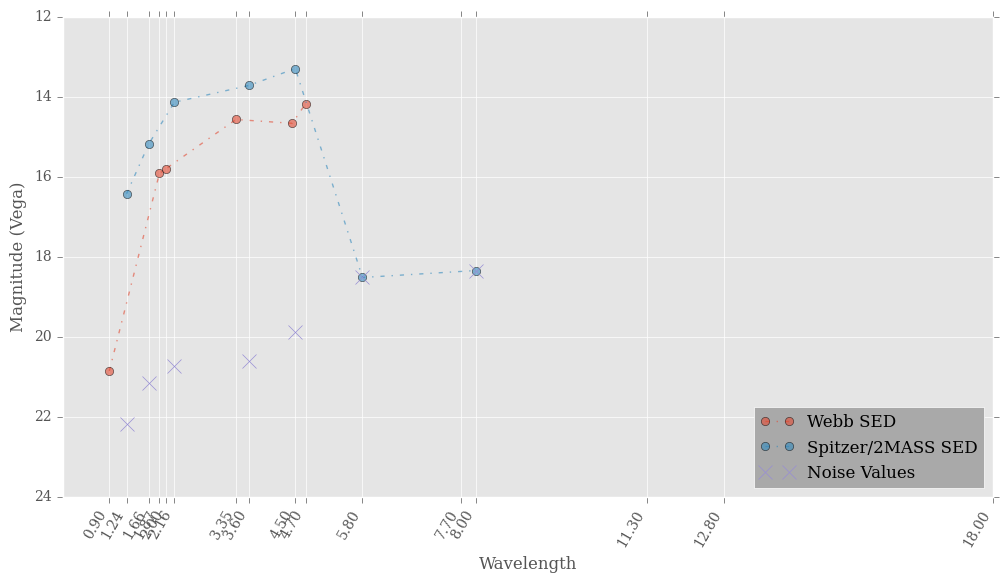

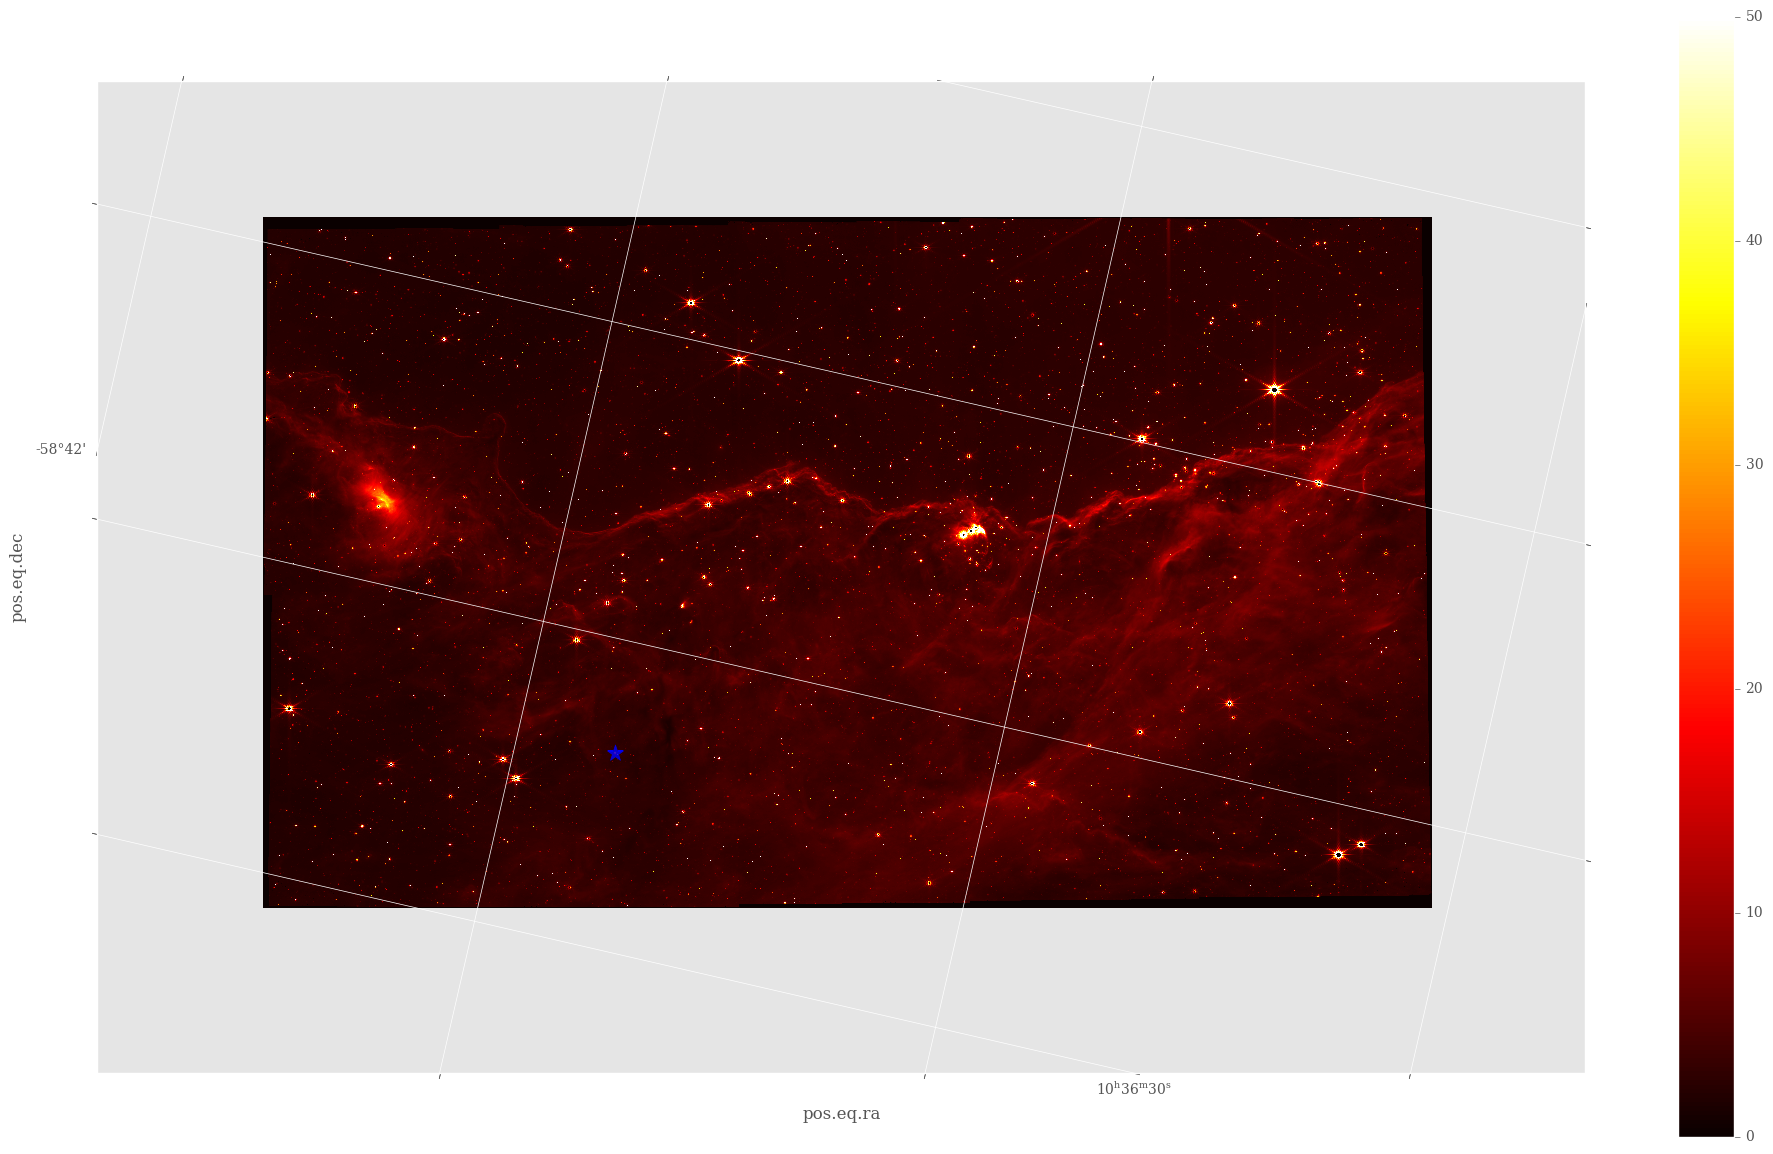

In [682]:
spitz2m_bands = [idx for idx in jwst_spitz_cat.columns.values if (idx[:3].lower() == 'mag')]
maxes = jwst_spitz_cat[spitz2m_bands].max().to_numpy()

n = 56
sed_plot(jwst_spitz_cat.iloc[[n]],correction=0.7,maxes=maxes)

print(jwst_spitz_cat['Preds'].loc[n])
print(jwst_spitz_cat['PRF_Preds'].loc[n])


fig, ax = plt.subplots(figsize=(24,14),dpi=100)
ax = plt.subplot(projection=wcs)

plt.grid(color='white', ls='solid')
plt.imshow(f[1].data,cmap='hot',vmin=0,vmax=50,origin='lower') #vmax =1500 for f1800w
ymax, ymin = ax.get_ylim()
xmax, xmin = ax.get_xlim()
plt.colorbar()

ax.scatter(jwst_spitz_cat['RA'].loc[n],jwst_spitz_cat['DEC'].loc[n],marker='*', c='b',edgecolor = 'b',s=150, alpha=0.8, transform=ax.get_transform('fk5'))

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/2384127966.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist([np.count_nonzero(jwst_spitz_cat[bands].iloc[i].isna())/2 for i in jwst_spitz_cat[jwst_spitz_cat.PRF_Preds==0][jwst_spitz_cat.Preds!=0].index],bins=np.arange(1,11,1))
/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/2384127966.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [np.count_nonzero(jwst_spitz_cat[bands].iloc[i].isna())/2 for i in jwst_spitz_cat[jwst_spitz_cat.PRF_Preds==0][jwst_spitz_cat.Preds!=0].index]


[4.0,
 5.0,
 4.0,
 4.0,
 3.0,
 3.0,
 4.0,
 8.0,
 3.0,
 9.0,
 3.0,
 3.0,
 6.0,
 7.0,
 4.0,
 9.0,
 4.0,
 6.0,
 4.0,
 4.0,
 7.0,
 7.0,
 8.0,
 4.0,
 5.0,
 8.0,
 7.0,
 5.0,
 4.0,
 6.0,
 5.0,
 5.0,
 4.0,
 4.0,
 7.0]

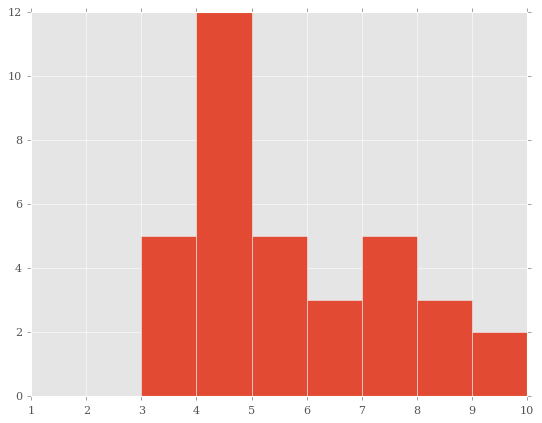

In [581]:
plt.hist([np.count_nonzero(jwst_spitz_cat[bands].iloc[i].isna())/2 for i in jwst_spitz_cat[jwst_spitz_cat.PRF_Preds==0][jwst_spitz_cat.Preds!=0].index],bins=np.arange(1,11,1))

[np.count_nonzero(jwst_spitz_cat[bands].iloc[i].isna())/2 for i in jwst_spitz_cat[jwst_spitz_cat.PRF_Preds==0][jwst_spitz_cat.Preds!=0].index]

kld - divergence metric

In [582]:
jwst_spitz_cat[bands].columns

Index(['isophotal_vegamag_f090w', 'isophotal_vegamag_err_f090w',
       'isophotal_vegamag_f187n', 'isophotal_vegamag_err_f187n',
       'isophotal_vegamag_f200w', 'isophotal_vegamag_err_f200w',
       'isophotal_vegamag_f335m', 'isophotal_vegamag_err_f335m',
       'isophotal_vegamag_f444w', 'isophotal_vegamag_err_f444w',
       'isophotal_vegamag_f444w-f470n', 'isophotal_vegamag_err_f444w-f470n',
       'isophotal_vegamag_f770w', 'isophotal_vegamag_err_f770w',
       'isophotal_vegamag_f1130w', 'isophotal_vegamag_err_f1130w',
       'isophotal_vegamag_f1280w', 'isophotal_vegamag_err_f1280w',
       'isophotal_vegamag_f1800w', 'isophotal_vegamag_err_f1800w'],
      dtype='object')

In [583]:
np.count_nonzero([5,3,np.nan])

3

In [646]:
import bisect
from scipy.stats import chisquare
def minimize_distance(new_data, new_locs, true_data, true_locs, Print=True):
    """
    Take a set of variables and their locations, and match them to a distribution computed from discrete true data.
    Find a correction such that the difference between their distributions is minimized

    Parameters:
    -------------
    new_data : Data that needs to be normalized to the true values
    true_data: Discrete data taken to be ground truth for this object. The districution is approximated from these data.

    Returns:
    ------------
    rexp: The correction necessary to minimize the distance between distributions
    chi2: The chi-squared values for the two distributions
    """

    # calculate slopes at each point
    m = np.zeros(len(true_data)-1)
    b = np.zeros(len(true_data)-1)
    for i in np.arange(0,len(true_data)-1):
        m[i] = (true_data[i] - true_data[i+1])/(true_locs[i]-true_locs[i+1])
        b[i] = true_data[i] - m[i]*true_locs[i]
    
    # Find expectation value for each point in new_data
    M = np.zeros(len(new_data))
    for j, nd in enumerate(new_locs):
        idx = bisect.bisect_right(true_locs, nd)
        if (0 < idx < len(m)) and (~np.isnan(new_data[j])):
            M[j] = m[idx-1]*nd +b[idx-1]
        else: 
            M[j] = new_data[j]

    rexp = np.nanmean(M-new_data)
    rstd = np.nanstd(M-new_data)
    
    chi2 = chisquare(np.array(new_data+rexp)[~np.isnan(np.array(new_data+rexp))],np.array(M)[~np.isnan(np.array(M))])
    if Print:
        print(f"Expectation of correction value is: {rexp}\nStandard deviation of expectation value is: {rstd}")
        print(f"Chi-Squared for this function is then: {chi2}")
    
    return rexp, chi2


Expectation of correction value is: 1.605742733608438
Standard deviation of expectation value is: 2.946399382418202
Chi-Squared for this function is then: Power_divergenceResult(statistic=3.204303247867588, pvalue=0.6685215852072441)


/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/57693099.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(spitz_mic,maxes,'.',marker='x',markersize=10,label='Noise Values')


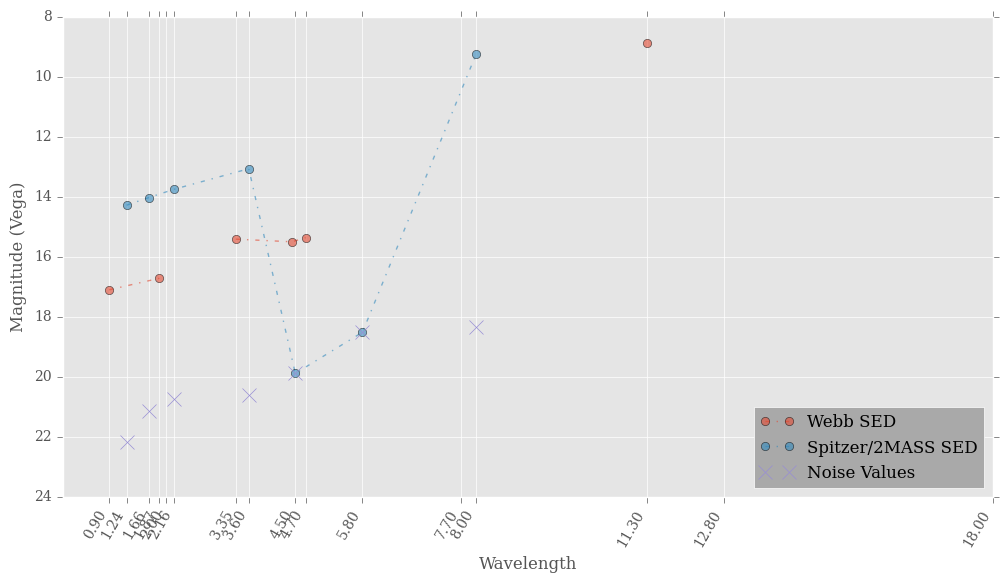

In [689]:
webb_bands = [idx for idx in jwst_spitz_cat.columns.values if (idx[:3].lower() == 'iso' and (idx[-9:-6] != 'err' and idx[-15:-12] != 'err'and idx[-10:-7] != 'err'))]
webb_mic = [int(webb_bands[i].split('f')[-1][:-1])/100 for i in np.arange(0,len(webb_bands))]
spitz_mic = [1.235,1.662,2.159,3.6,4.5,5.8,8.0]
    
n=133

corr, chi2 = minimize_distance(new_data=jwst_spitz_cat[webb_bands].iloc[n].to_numpy(),new_locs=webb_mic,true_data=jwst_spitz_cat[spitz2m_bands].iloc[n].to_numpy(),true_locs=spitz_mic)
sed_plot(jwst_spitz_cat.iloc[[n]],correction=corr,maxes=maxes,chi2=chi2)



520
0.030237313516741478


(array([  3.,  14., 249., 175.,  53.,  16.,   4.,   4.,   1.,   1.]),
 array([-3.60020612, -2.46367084, -1.32713556, -0.19060028,  0.94593501,
         2.08247029,  3.21900557,  4.35554085,  5.49207613,  6.62861142,
         7.7651467 ]),
 <BarContainer object of 10 artists>)

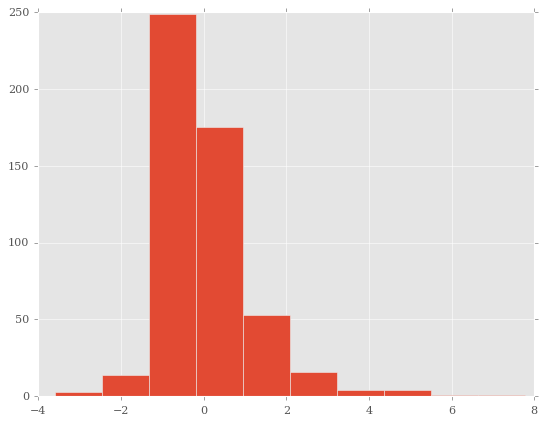

In [683]:
corrs = np.zeros(len(jwst_spitz_cat))
chi2s = np.zeros(len(jwst_spitz_cat))
print(len(jwst_spitz_cat))
for n in np.arange(0,len(jwst_spitz_cat)):
    rexp, chi2 = minimize_distance(new_data=jwst_spitz_cat[webb_bands].iloc[n].to_numpy(),new_locs=webb_mic,true_data=jwst_spitz_cat[spitz2m_bands].iloc[n].to_numpy(),true_locs=spitz_mic, Print=False)
    corrs[n] = rexp
    chi2s[n] = chi2[0]
print(np.mean(corrs))
plt.hist(corrs)
# mu = np.mean(corrs)
# sig = np.std(corrs)
# binwidth=0.5
# yM = binwidth*len(corrs)
# bins_gaus = np.linspace(-4,8,2400)
# plt.plot(bins_gaus, yM*(1/(sig * np.sqrt(2 * np.pi)) * np.exp( - (bins_gaus - mu)**2 / (2 * sig**2)) ),linewidth=2, color='k')
# print(mu)
# print(sig)

-0.6005941963195237


(array([  2.,   4., 142., 191.,  31.,   2.,   3.,   1.,   0.,   6.]),
 array([-4.05581892, -3.03017375, -2.00452859, -0.97888342,  0.04676174,
         1.07240691,  2.09805207,  3.12369724,  4.14934241,  5.17498757,
         6.20063274]),
 <BarContainer object of 10 artists>)

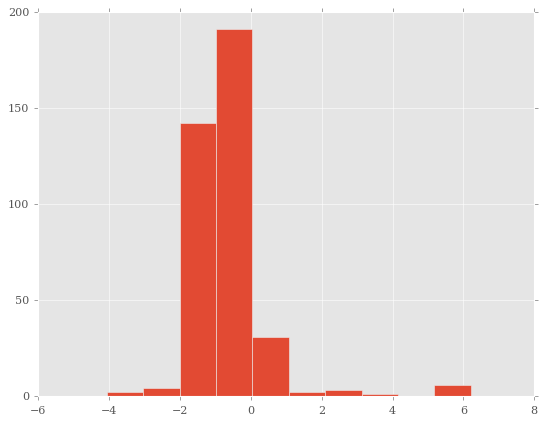

In [684]:
diffs = jwst_spitz_cat.mag_IR2-jwst_spitz_cat.isophotal_vegamag_f444w
print(np.nanmean(diffs))
plt.hist(diffs)

Keep 4.5-4.44

Don't forget mags are logarithmic, look at Jy 2.5log(J1/J2)

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_37818/57693099.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(spitz_mic,maxes,'.',marker='x',markersize=10,label='Noise Values')


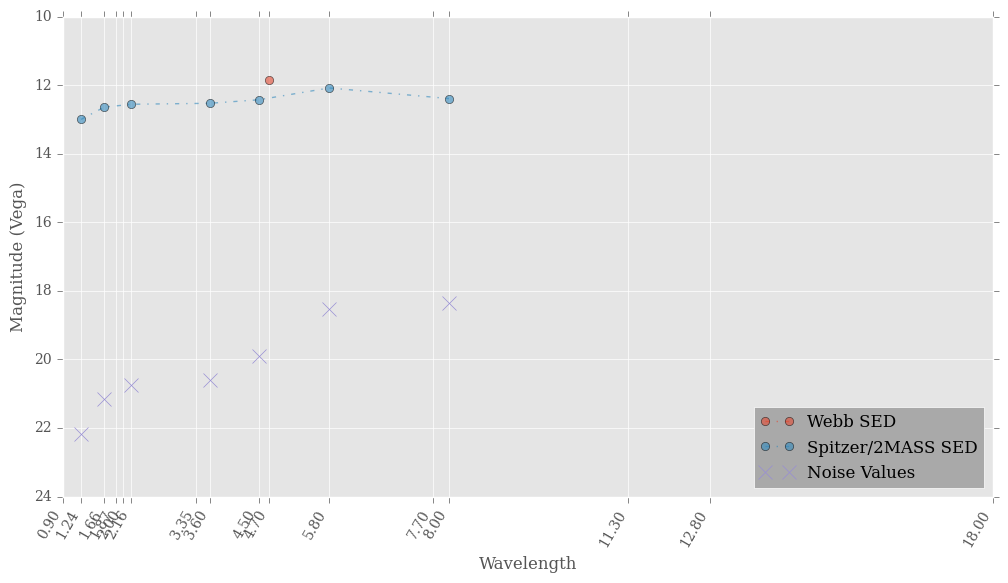

In [698]:
n=7
sed_plot(jwst_spitz_cat.iloc[[n]],correction=-0.60,maxes=maxes,chi2=chi2)